
# K-Means Clustering on Wine Quality Dataset

This notebook demonstrates the process of performing K-Means clustering on the Wine Quality dataset. The steps include data loading, preprocessing, visualization, and implementing the K-Means algorithm from scratch.


Wine Quality - https://www.kaggle.com/datasets/rajyellow46/wine-quality



In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist



## Step 1: Loading the Dataset

First, we load the dataset into a pandas DataFrame to examine its structure.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# Load the dataset
file_path = '/content/drive/MyDrive/DM-Assignment-Dataset/winequalityN.csv'
wine_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
wine_data.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



## Step 2: Data Preprocessing and Cleaning

In this step, we remove rows with missing values to clean the dataset.


In [4]:

# Data Cleaning: Removing rows with missing values
cleaned_wine_data = wine_data.dropna()



## Step 3: Data Visualization

We visualize the data using histograms for distributions and scatter plots to understand relationships between variables.


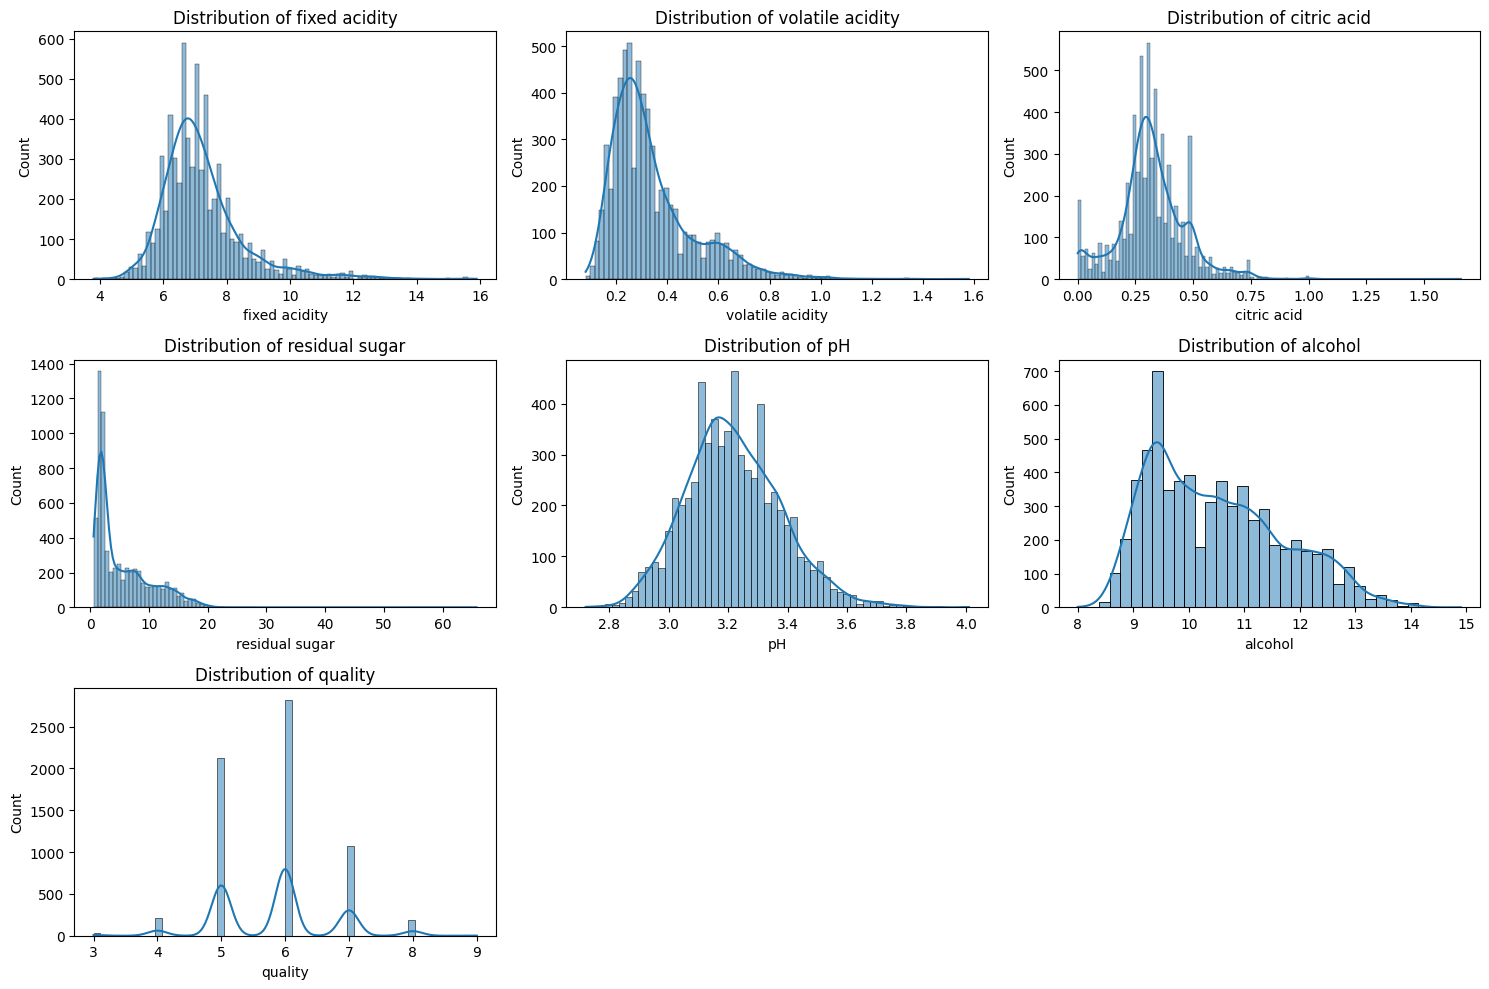

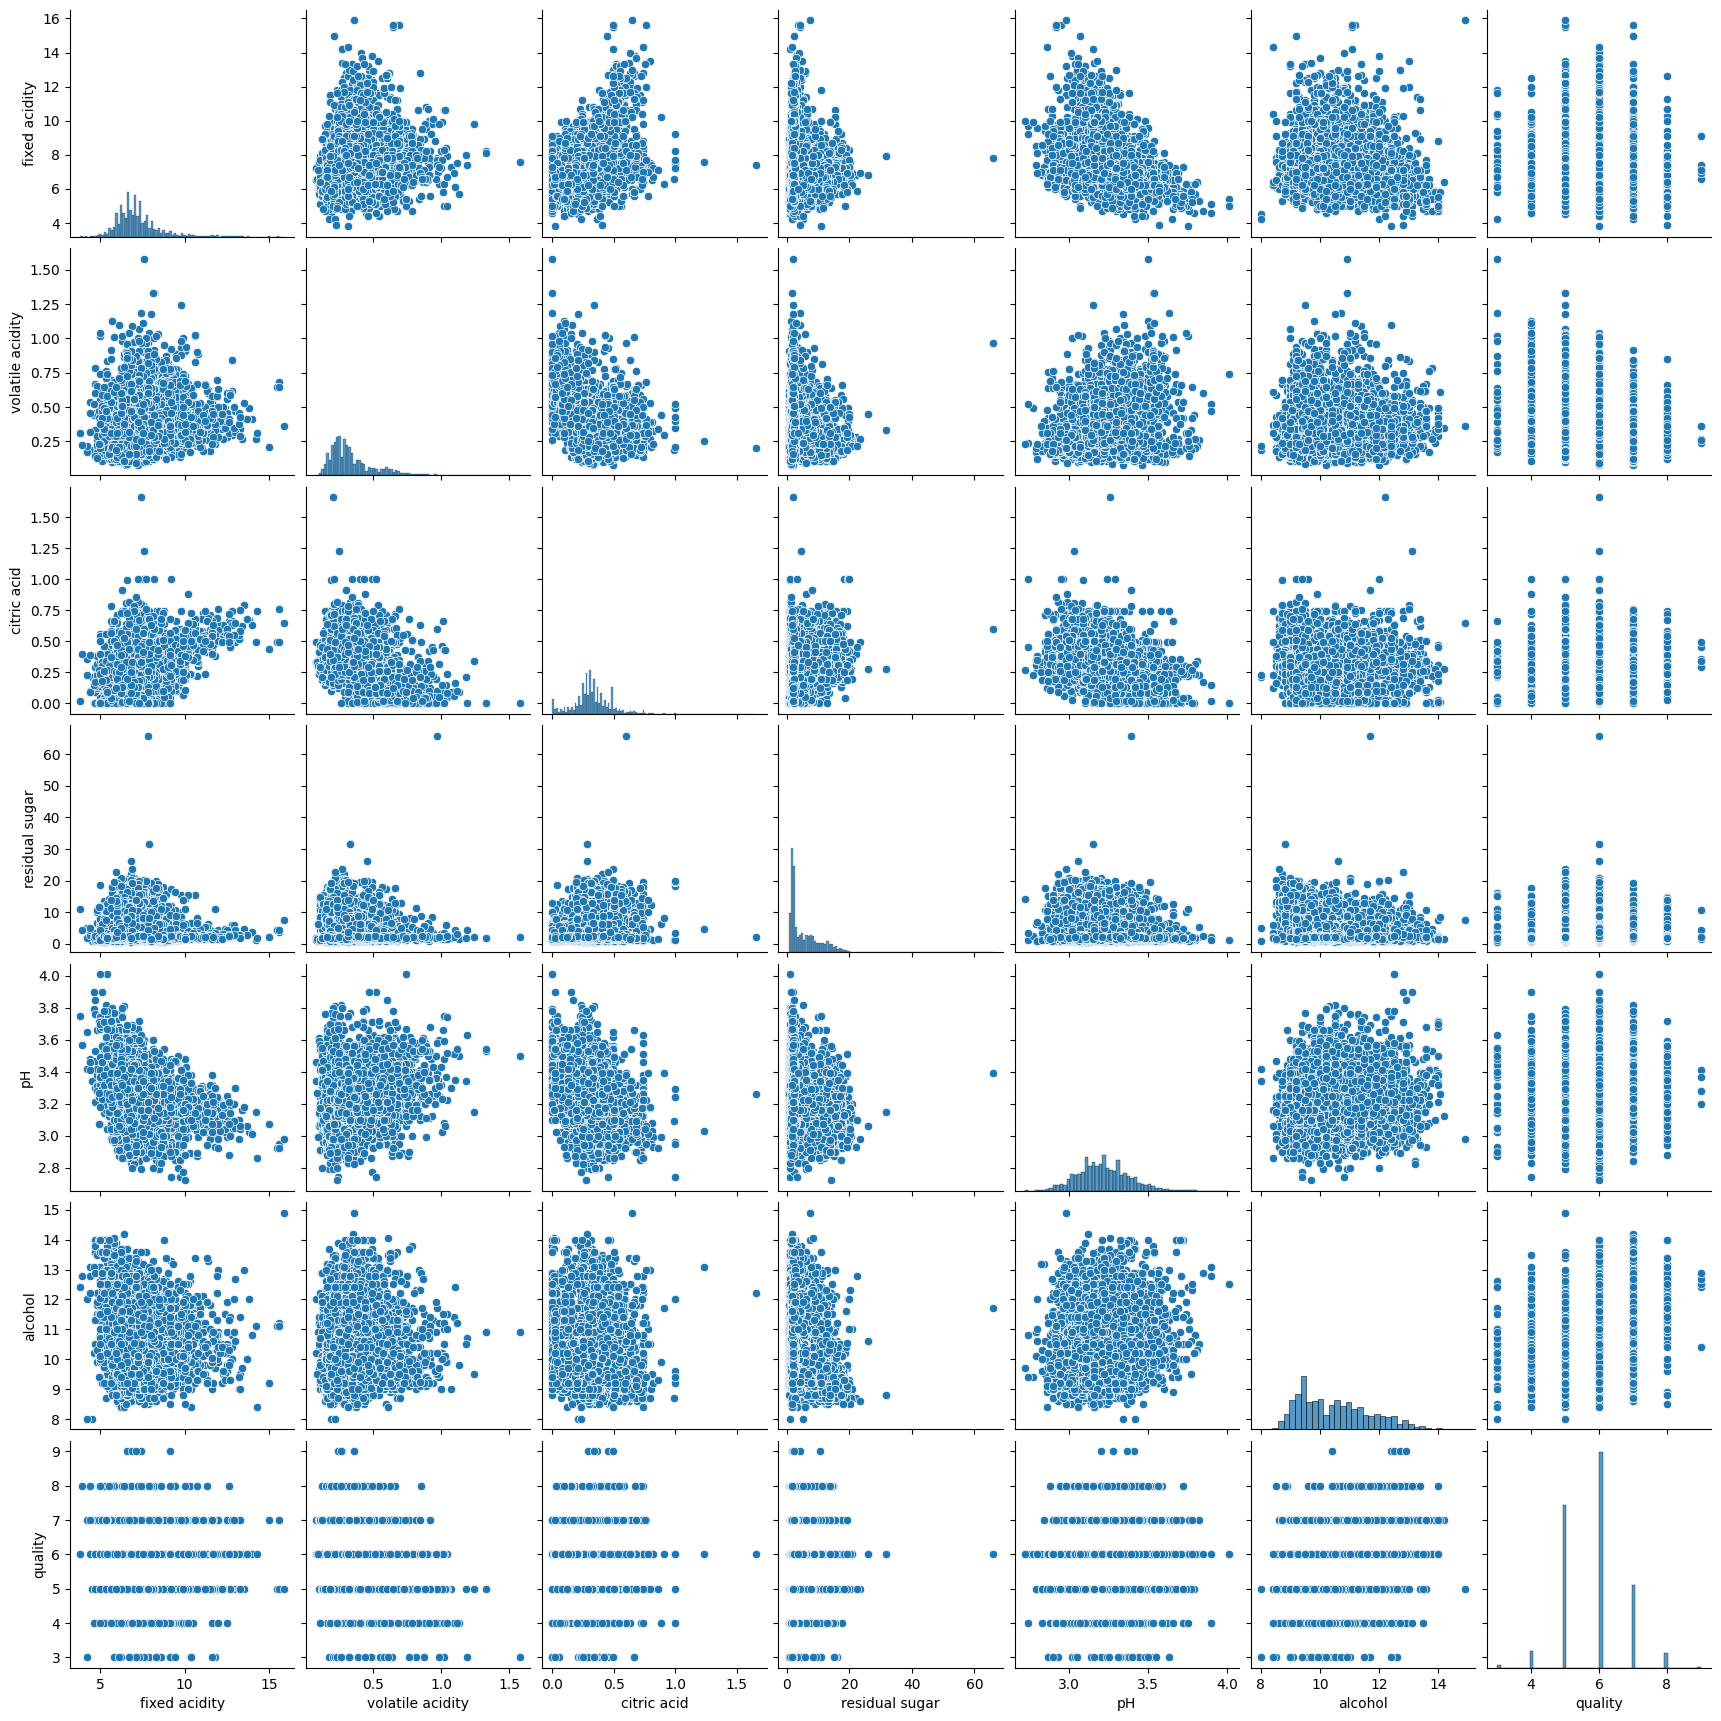

In [5]:

# Data Visualization: Histograms and Pairplot
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'pH', 'alcohol', 'quality']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(cleaned_wine_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

sns.pairplot(cleaned_wine_data[selected_features])
plt.show()


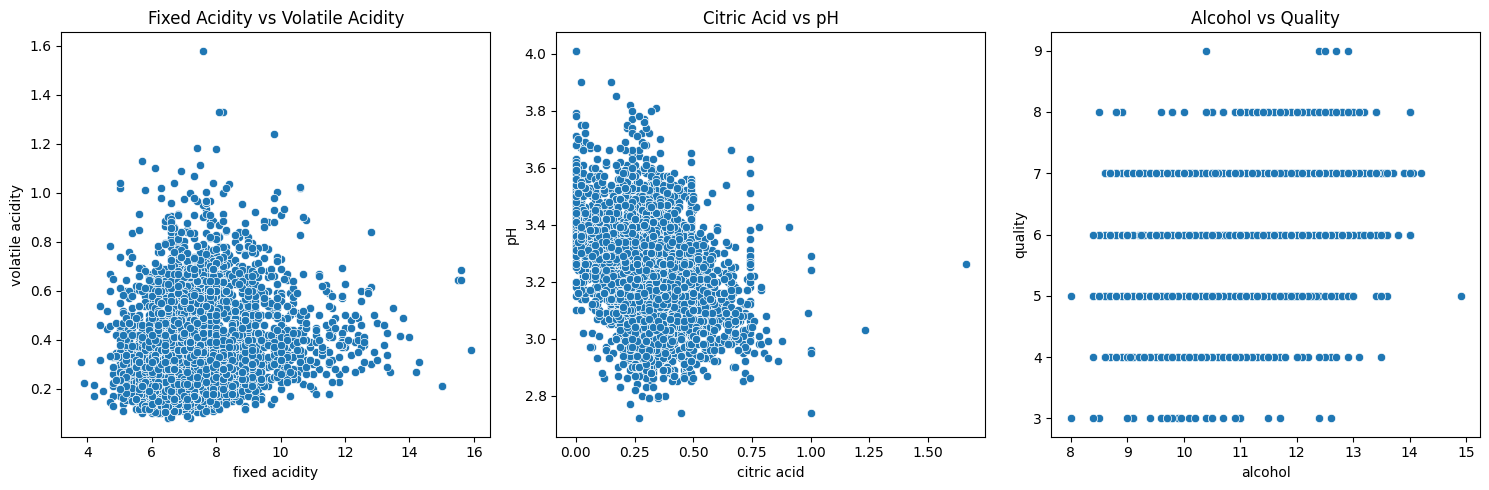

In [6]:

# Scatter Plot Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='fixed acidity', y='volatile acidity', data=cleaned_wine_data)
plt.title('Fixed Acidity vs Volatile Acidity')

plt.subplot(1, 3, 2)
sns.scatterplot(x='citric acid', y='pH', data=cleaned_wine_data)
plt.title('Citric Acid vs pH')

plt.subplot(1, 3, 3)
sns.scatterplot(x='alcohol', y='quality', data=cleaned_wine_data)
plt.title('Alcohol vs Quality')

plt.tight_layout()
plt.show()


## Step 3: Selecting the Number of Clusters (k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

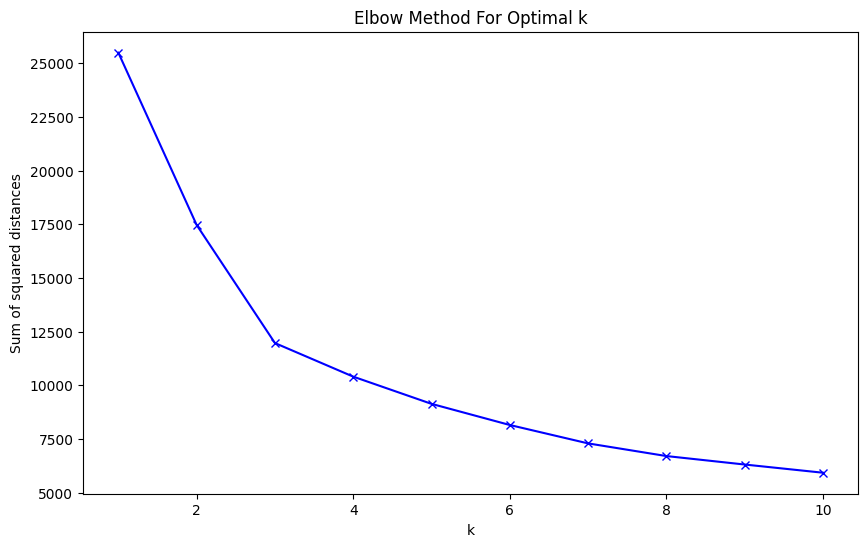

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Selecting features for clustering
features_for_clustering = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'alcohol', 'quality']
clustering_data = cleaned_wine_data[features_for_clustering]

# Finding the optimal number of clusters using the Elbow Method
sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(clustering_data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



## Step 4: K-Means Clustering from Scratch

Here, we implement the K-Means clustering algorithm from scratch and apply it to the dataset.


In [8]:

# K-Means Clustering from Scratch
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data.iloc[indices].to_numpy()
    return centroids

def assign_clusters(data, centroids):
    distances = cdist(data.to_numpy(), centroids, 'euclidean')
    return np.argmin(distances, axis=1)

def update_centroids(data, assignments, k):
    new_centroids = np.array([data[assignments == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        assignments = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, assignments, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return assignments, centroids

# Running K-Means with k=3
features_for_clustering = ['fixed acidity', 'volatile acidity', 'citric acid', 'pH', 'alcohol', 'quality']
clustering_data = cleaned_wine_data[features_for_clustering]
assignments, final_centroids = kmeans(clustering_data, k=3)
clustering_data['Cluster'] = assignments


<ipython-input-8-3f3ffde06217>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = assignments



## Visualization of the Clusters

We now create scatter plots to visualize how the clusters are distributed.


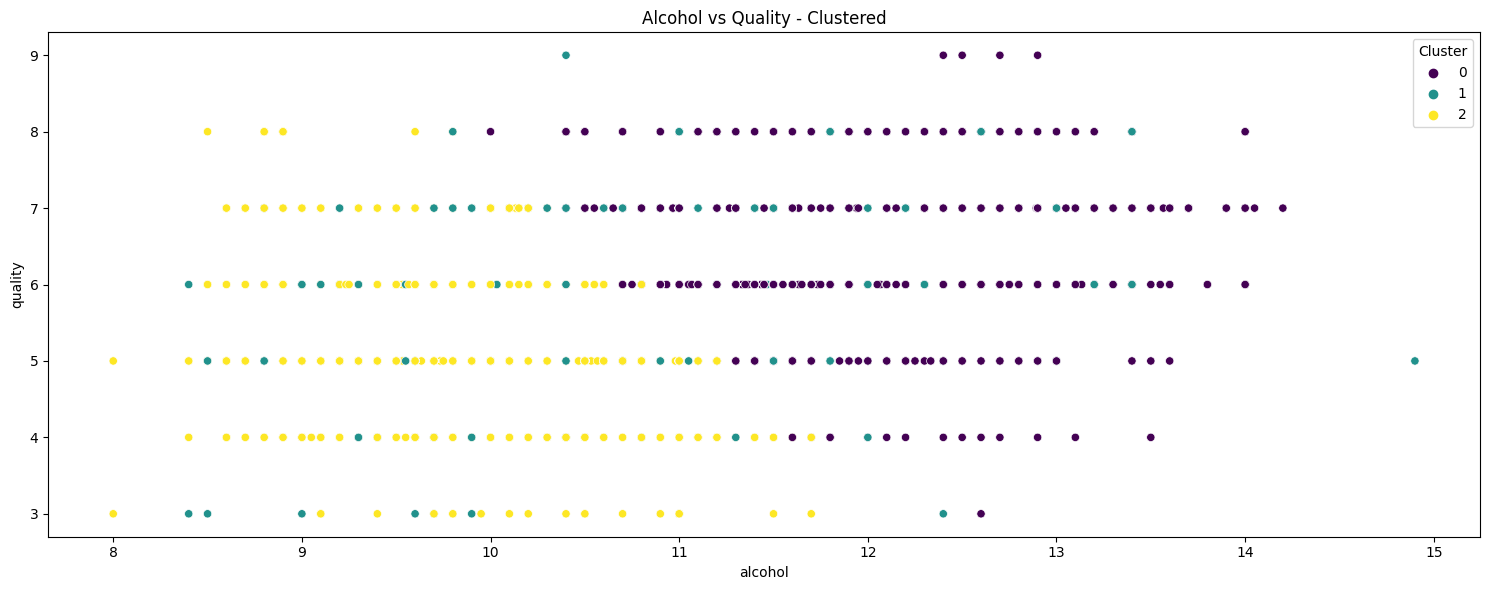

In [9]:

# Scatter Plot of Clusters
plt.figure(figsize=(15, 6))

sns.scatterplot(x='alcohol', y='quality', hue='Cluster', palette='viridis', data=clustering_data)
plt.title('Alcohol vs Quality - Clustered')

plt.tight_layout()
plt.show()


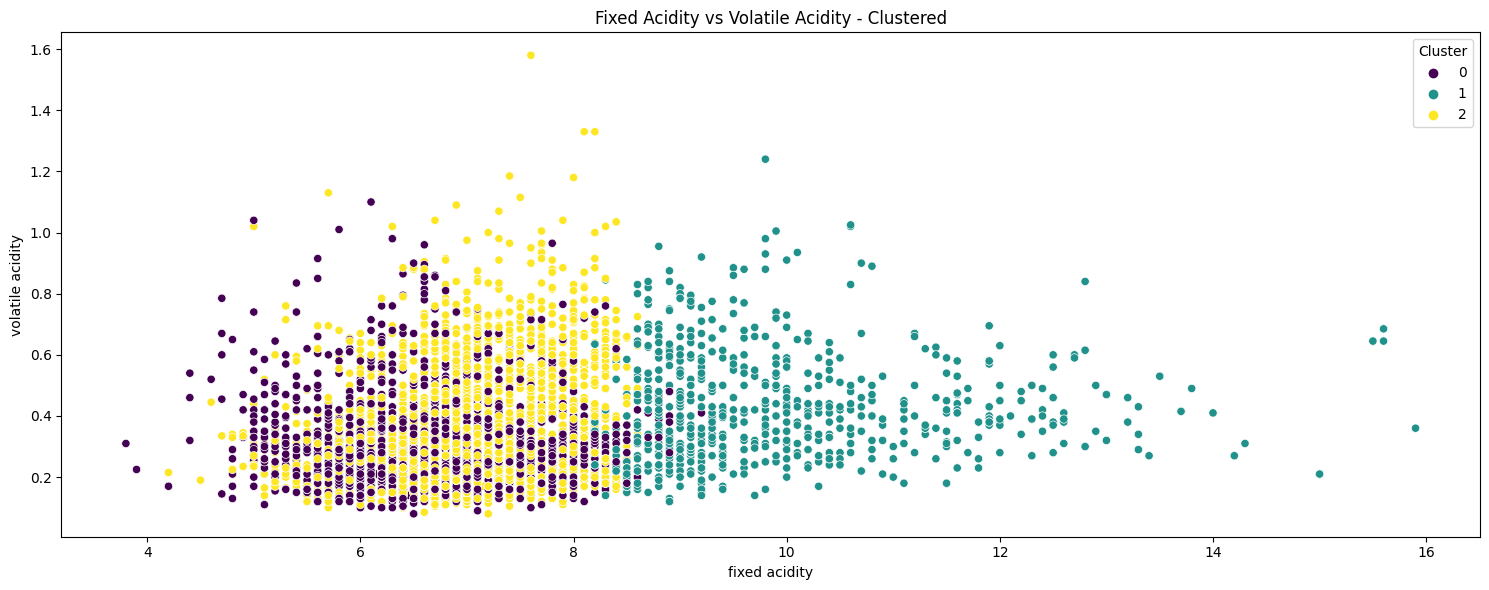

In [10]:
# Scatter Plot of Clusters
plt.figure(figsize=(15, 6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='Cluster', palette='viridis', data=clustering_data)
plt.title('Fixed Acidity vs Volatile Acidity - Clustered')

plt.tight_layout()
plt.show()